## Model of HIV Concentration

Implimentation of HIV minimal model using Euler's Method

In [1]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

In [2]:
def update_func(state, system):
    """Calculate and update state
    
    state: State(R, L, E, V)
    system: System object
    
    returns: State(R, L, E, V)
    """
    
    unpack(system)
    R, L, E, V = state
    
    # Calculates change in R
    dR = ((gamma*tau) - (mu*R) - (beta*R*V)) * dt

    # Calculates change in L
    dL = ((rho*beta*R*V) - (mu*L) - (alpha*L)) * dt
    
    # Calculates change in E
    dE = (((1-rho)*beta*R*V) + (alpha*L) - (delta*E)) * dt
    
    # Calculates change in V
    dV = ((pi*E) - (sigma*V)) * dt
    
    # Updates values by adding calculated change to previous value
    R1 = R + dR
    L1 = L + dL
    E1 = E + dE
    V1 = V + dV
    
    return State(R=R1, L=L1, E=E1, V=V1)

In [3]:
def run_simulation(state, system):
    """Runs a simulation of the system 
    
    state: initial State(R, L, E, V)
    system: System object 
    
    returns: TimeFrame
    """
        
        
    frame = TimeFrame(columns=state.index)
    frame.row[0] = state
    
    for i in range(int(t0), int(tend)):
        frame.row[i+1] = update_func(frame.row[i], system)
        
    return frame

In [4]:
def plot_results(results):
    """Plots results
    
    results: TimeFrame from run_simulation
    """
    unpack(results)
    plot(R, label='R')
    plot(L, label='L')
    plot(E, label='E')
    decorate(xlabel='Time (centidays)',
             ylabel='Population',
             title='R, L, E Populations vs Time')
    

In [5]:
# Sets initial conditions
state = State(R = 200,
              L = 0,
              E = 0,
              V = 100)

# Sets system parameters
system = System(gamma = 1.36,
                mu = 0.00136,
                tau = 0.2,
                beta = 0.00027,
                rho = 0.1,
                alpha = 0.036,
                sigma = 2,
                delta = 0.33,
                pi = 100,
                dt = .01,
                t0 = 0,
                tend = 1000)

,values
gamma,1.36000
mu,0.00136
tau,0.20000
beta,0.00027
rho,0.10000
alpha,0.03600
sigma,2.00000
delta,0.33000
pi,100.00000
dt,0.01000


In [8]:
# Initialize TimeFrame and update_func
frame = TimeFrame(index = range(int(system.t0), int(system.tend)), columns=state.index)
init = update_func(state, system)

,values
R,199.9460
L,0.0054
E,0.0486
V,98.0000


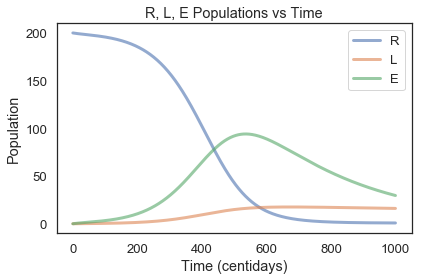

In [9]:
results = run_simulation(state, system)
plot_results(results)